In [2]:
import scipy
import logging
import atlite
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
from init import *

In [4]:
from src.config import *

In [5]:
wind = xr.open_mfdataset([INTERIM_DIR / 'wind' / f'wind_2012-{month:02d}.nc' for month in MONTHS])

In [6]:
from src.renewable_timeseries import *

/home/pregner/micromamba/envs/syfop-global-costs/lib/python3.9/site-packages/atlite/cutout.py:187: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


In [29]:
cutout

<Cutout "global-2012-01">
 x = -180.00 ⟷ 179.75, dx = 0.25
 y = -90.00 ⟷ 89.75, dy = 0.25
 time = 2012-01-01 ⟷ 2012-01-31, dt = H
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

[########################################] | 100% Completed | 25.12 s


<xarray.DataArray 'specific generation' (y: 720, x: 1440)>
array([[  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [108.81145 , 108.857086, 108.905075, ..., 108.678665, 108.72276 ,
        108.76575 ],
       [114.02556 , 114.14603 , 114.27197 , ..., 113.69667 , 113.79807 ,
        113.90986 ],
       ...,
       [261.47226 , 261.45193 , 261.37598 , ..., 261.41568 , 261.4854  ,
        261.48743 ],
       [254.41255 , 254.33525 , 254.26405 , ..., 254.68765 , 254.59021 ,
        254.5004  ],
       [250.62067 , 250.61285 , 250.58597 , ..., 250.71667 , 250.68242 ,
        250.65155 ]], dtype=float32)
Coordinates:
  * x        (x) float64 -180.0 -179.8 -179.5 -179.2 ... 179.0 179.2 179.5 179.8
  * y        (y) float64 -90.0 -89.75 -89.5 -89.25 ... 89.0 89.25 89.5 89.75
    lon      (x) float64 -180.0 -179.8 -179.5 -179.2 ... 179.0 179.2 179.5 179.8
    lat      (y) float64 -90.0 -89.75 -89.5 -89.25 ... 89.0 89.25 89.5 89.75
Attributes:
    units:    MWh/MWp

In [31]:
wind??

Signature: wind(cutout)
Docstring: <no docstring>
Source:   
def wind(cutout):
    sparse_identity = scipy.sparse.identity(cutout.data.sizes["x"] * cutout.data.sizes["y"])
    wind = cutout.wind("Vestas_V90_3MW", matrix=sparse_identity)
    wind = unstack_to_xy(wind, cutout)
    return wind
File:      /data/users/pregner/syfop-global-costs/src/renewable_timeseries.py
Type:      function

In [16]:
from atlite.resource import *

In [ ]:
pl

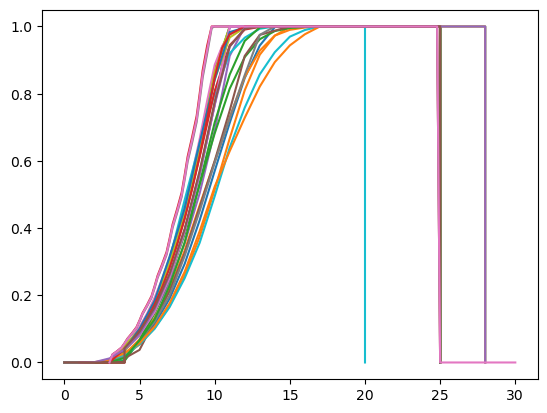

In [27]:
for name in windturbines:
    turbine = get_windturbineconfig(name)
    plt.plot(turbine['V'], turbine['POW']/turbine['P'], label=f"{name}: {turbine['hub_height']}, {turbine['P']}")

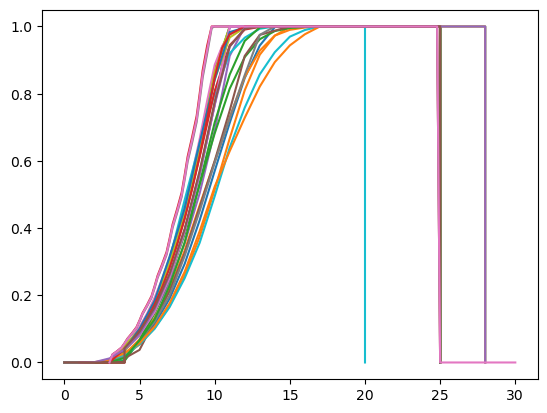

In [27]:
for name in windturbines:
    turbine = get_windturbineconfig(name)
    plt.plot(turbine['V'], turbine['POW']/turbine['P'], label=f"{name}: {turbine['hub_height']}, {turbine['P']}")

In [34]:
cutout = download_era5(2012, 1)
wind_per_turbine = {name: cutout.wind(name) for name in windturbines}

/home/pregner/micromamba/envs/syfop-global-costs/lib/python3.9/site-packages/atlite/cutout.py:187: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


[########################################] | 100% Completed | 11.37 s
[########################################] | 100% Completed | 6.16 s
[########################################] | 100% Completed | 4.33 s
[########################################] | 100% Completed | 5.65 s
[########################################] | 100% Completed | 4.86 s
[########################################] | 100% Completed | 4.53 s
[########################################] | 100% Completed | 4.44 s
[########################################] | 100% Completed | 5.25 s
[########################################] | 100% Completed | 4.85 s
[########################################] | 100% Completed | 4.35 s
[########################################] | 100% Completed | 4.25 s
[########################################] | 100% Completed | 4.23 s
[########################################] | 100% Completed | 4.34 s
[########################################] | 100% Completed | 4.33 s
[################################

In [53]:
wind_avg_per_turbine = {turbine: values.mean() for turbine, values in wind_per_turbine.items()}

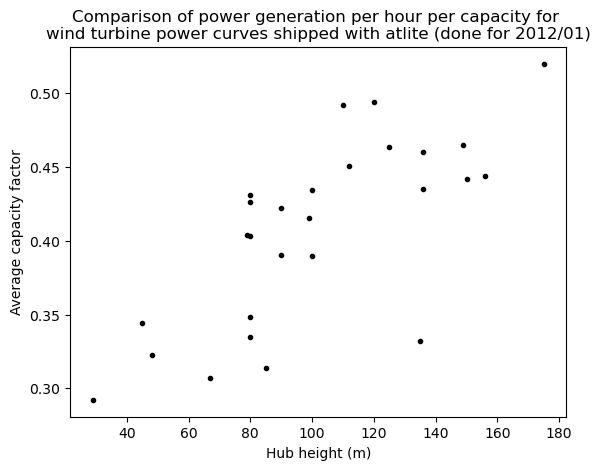

In [70]:
plt.plot(*np.array([(get_windturbineconfig(name)['hub_height'], windavg/cutout.data.sizes['time'])
                    for name, windavg in wind_avg_per_turbine.items()]).T,
         'ok',
         markersize=3)
plt.title('Comparison of power generation per hour per capacity for \nwind turbine power curves shipped with atlite (done for 2012/01)')
plt.xlabel('Hub height (m)');
plt.ylabel('Average capacity factor');

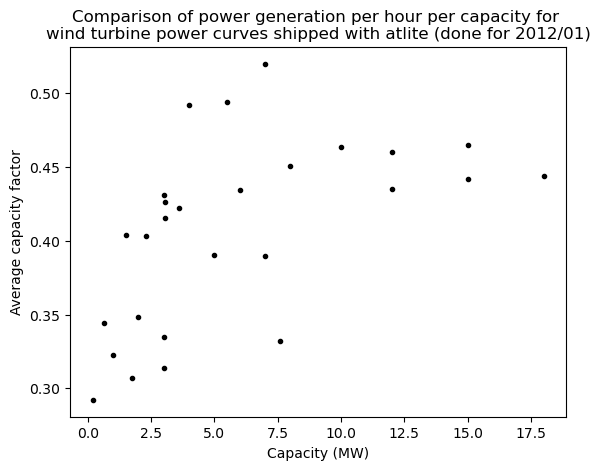

In [71]:
plt.plot(*np.array([(get_windturbineconfig(name)['P'], windavg/cutout.data.sizes['time'])
                    for name, windavg in wind_avg_per_turbine.items()]).T,
         'ok',
         markersize=3)
plt.title('Comparison of power generation per hour per capacity for \nwind turbine power curves shipped with atlite (done for 2012/01)')
plt.xlabel('Capacity (MW)');
plt.ylabel('Average capacity factor');

In [79]:
(max(wind_avg_per_turbine.values()) - min(wind_avg_per_turbine.values()))/min(wind_avg_per_turbine.values())

<xarray.DataArray 'specific generation' ()>
array(0.77943087, dtype=float32)